# Kmeans & Image Quantization

Kmeans is an unsupervised learning method. We generally use Kmeans with unlabeled data and split it into $k$ different groups. In the following document, we are gonna analyze different implementations of Kmeans from scratch and we are gonna see a image quantization application.

## Generating the Data

First, we will use a really easy example to test our algorithm implementation. Our data is data points sampled from two different bivariate normal distributions. For a given data point, we will hide its label (in other word, its original distribution). By using kmeans, we are hoping to be able to cluster these points with an interesting pattern.

In [16]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import collections
import glob
import pprint

In [90]:
# Parameters of the simulated mutivariate gaussian distribution
mean_d1 = [0, 0]
mean_d2 = [5, 5]
cov = [[1, 0], [0, 1]] 
x1, y1 = np.random.multivariate_normal(mean_d1, cov, 5000).T
x2, y2 = np.random.multivariate_normal(mean_d2, cov, 5000).T
color = np.array(["red" for i in range(5000)]+["blue" for i in range(5000)]) 

# Hide our labels
x = np.concatenate((x1,x2),axis=0)
y = np.concatenate((y1,y2),axis=0)

Text(0,0.5,'y')

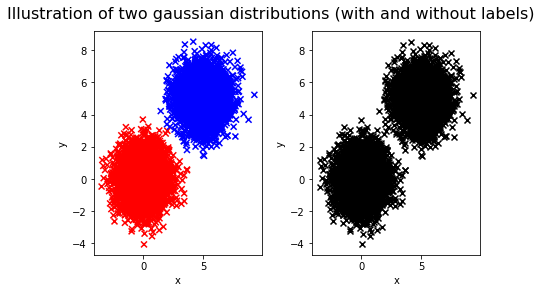

In [91]:
# Plot
fig, axs = plt.subplots(1, 2, constrained_layout=True)
axs[0].scatter([x1,x2], [y1,y2],color=color,marker='x')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.suptitle('Illustration of two gaussian distributions (with and without labels)', fontsize=16)

axs[1].scatter(x,y,color='black',marker='x')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')


We just hide our labels. The next step is to proceed to the implementation. 

## Implementing the Algorithm

First, let's describe the steps of kmeans algorithm:
<ol>
  <p></p>
  <li>Choose some cluster centers</li>
  <li>Repeat until convergence:</li>
  <p>a) Assign points to nearest center.</p>
  <p>b) Update center to mean of points.</p>
  <p>c) Check if converged.</p>
</ol>

### Basic Implementation 

In [98]:
def distance(x,y):
    """
    Calculate the distance between two observations x and y.
    """
    return sum((xi-yi)**2 for xi,yi in zip(x,y))

def find_labels(points,centers):
    """
    Calculate the labels of every observations given a set of centers.
    """
    labels=[]
    for point in points:
        distances = [distance(point,center) for center in centers]
        labels.append(distances.index(min(distances)))
    return labels

def compute_centers(points,labels):
    """
    Compute centers with given observations and labels
    """
    n_centers = len(set(labels))
    n_dims = len(points[0])
    
    centers = [[0 for i in range(n_dims)] for j in range(n_centers)]
    counts = [0 for j in range(n_centers)]
    
    for label, point in zip(labels,points):
        counts[label] += 1
        centers[label] = [a + b for a,b in zip(centers[label],point)]
        
    return [[x/count for x in center] for center,count in zip(centers,counts)]
        
def compute_kmeans(points,n_clusters):
    """
    Implement the kmeans algorithm
    """
    centers = points[-n_clusters:]
    while 1:
        old_centers = centers
        labels = find_labels(points,centers)
        centers = compute_centers(points,labels)
        if np.array_equal(centers,old_centers):
            break
    return labels

In [99]:
# Testing our algorithm
calculated_labels = compute_kmeans(list(zip(x,y)),2)
colors_labels = ["red" if (element==1) else "blue" for element in calculated_labels]

Text(0,0.5,'y')

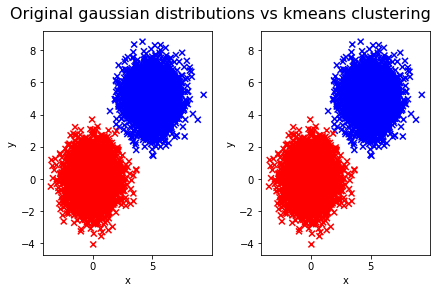

In [101]:
# Ploting our points with kmeans' labels
fig, axs = plt.subplots(1, 2, constrained_layout=True)
axs[0].scatter([x1,x2], [y1,y2],color=color,marker='x')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.suptitle('Original gaussian distributions vs kmeans clustering', fontsize=16)

axs[1].scatter(x,y,color=colors_labels,marker='x')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')


In [7]:
# Calculate the average time of our algorithm (for n_clusters=2)
import time
times = []
for i in range(10):
    # Parameters of the simulated mutivariate gaussian distribution
    mean_d1 = [0, 0]
    mean_d2 = [5, 5]
    cov = [[1, 0], [0, 1]] 
    x1, y1 = np.random.multivariate_normal(mean_d1, cov, 5000).T
    x2, y2 = np.random.multivariate_normal(mean_d2, cov, 5000).T

    # Hide our labels
    x = np.concatenate((x1,x2),axis=0)
    y = np.concatenate((y1,y2),axis=0)
    
    start = time.time()
    calculated_labels = compute_kmeans(list(zip(x,y)),2)
    end = time.time()
    times.append(end-start)
print("The simulation is over.")

The simulation is over.


In [32]:
print("Based on 10 kmeans computations (with 10000 observations and 2 clusters), we obtained:\n", np.mean(times),'s ±',np.std(times),'s')

Based on 10 kmeans computations (with 10000 observations and 2 clusters), we obtained:
 0.3570204734802246 s ± 0.06041208987527543 s


## Optimizing our algorithm

### Numpy solution

Lets use Numpy to optimize these steps! We need to redefine the functions that we created previously.

In [72]:
def find_labels_np(points,centers):
    diff = (points[:,None,:]-centers) ** 2
    distances = diff.sum(-1)
    return distances.argmin(1)

def compute_centers_np(points,labels):
    n_centers = len(set(labels))
    return np.array([points[labels==i].mean(0) for i in range(n_centers)])

def compute_kmeans_np(points,n_clusters):
    centers = points[-n_clusters:]
    while 1:
        old_centers = centers
        labels = find_labels_np(points,centers)
        centers = compute_centers_np(points,labels)
        if np.array_equal(centers,old_centers):
            break
    return labels,centers

In [43]:
# Calculate the average time of our algorithm (for n_clusters=2)
import time
times = []
for i in range(10):
    # Parameters of the simulated mutivariate gaussian distribution
    mean_d1 = [0, 0]
    mean_d2 = [5, 5]
    cov = [[1, 0], [0, 1]] 
    x1, y1 = np.random.multivariate_normal(mean_d1, cov, 5000).T
    x2, y2 = np.random.multivariate_normal(mean_d2, cov, 5000).T

    # Hide our labels
    x = np.concatenate((x1,x2),axis=0)
    y = np.concatenate((y1,y2),axis=0)
    
    start = time.time()
    calculated_labels = compute_kmeans_np(np.array(list(zip(x,y))),2)
    end = time.time()
    times.append(end-start)
print("The simulation is over.")

The simulation is over.


In [45]:
print("Based on 10 kmeans computations (with 10000 observations and 2 clusters), we obtained:\n", np.mean(times),'s ±',np.std(times),'s')

Based on 10 kmeans computations (with 10000 observations and 2 clusters), we obtained:
 0.024260854721069335 s ± 0.00969370136121552 s


## Application: Image Quantization

In a image, we got three dimensions (R,G,B) for every pixel. Thus, if we apply kmeans with such data, we will obtain different centroids that will be averages of the dominant colors of the image. By applying kmeans on an image, we could simplify an image by reducing the number of colors and it should be similar to the actual image for $K$ big enough. In fact, the higher the $K$ value, the more similar it should be to the original image.

For the image quantization problem, we will use the popular Lena image.

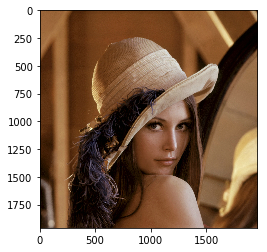

In [23]:
import skimage.io as io
logo = io.imread(r'C:\Users\Louis-Marc\Desktop\Cours\DS_fromScratch\lena.png')
imgplot = plt.imshow(logo)

In [24]:
from sklearn.cluster import KMeans

In [28]:
def image_quantization(path,K):
    """
    Reproduce a colored image by using kmeans algorithm
    path: Path to the image in the computer
    K: Number of clusters in kmeans algorithm
    """
    # Import and prepare image representation
    original_image = io.imread(path)
    flat_list_image = np.array([item for sublist in original_image for item in sublist],dtype='f')
    
    # Apply kmeans algorithm
    kmeans = KMeans(n_clusters=K, random_state=0).fit(flat_list_image)
    calculated_labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    # Substitute our clusters labels by the centroids
    centers_list = []
    for observation_label in calculated_labels:
        centers_list.append(centers[observation_label])
        
    # Prepare the new image
    new_center_list = np.vstack(centers_list)
    nested_center_list = []
    image_length = logo.shape[0]
    for i in range(image_length):
        nested_center_list.append(new_center_list[(i*image_length):((i+1)*image_length)])
        
    return np.array(nested_center_list,np.int32)

In [26]:
def save_personalized_plot(array_image,k,image_name,path):
    """
    Save an image with the k parameter as title
    """
    fig,ax = plt.subplots(1)
    image = plt.imshow(array_image)
    title_image = plt.title(r'$k=$' + str(k))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    fig.savefig(path + "\\" + image_name + '.png',bbox_inches='tight')

In [31]:
# Plotting for different values of k (to compare the images)
test_image_k5 = image_quantization(r'C:\Users\Louis-Marc\Desktop\Cours\DS_fromScratch\lena.png',5)
test_image_k10 = image_quantization(r'C:\Users\Louis-Marc\Desktop\Cours\DS_fromScratch\lena.png',10)
test_image_k15 = image_quantization(r'C:\Users\Louis-Marc\Desktop\Cours\DS_fromScratch\lena.png',15)
print("FINIT!")

FINIT!


[]

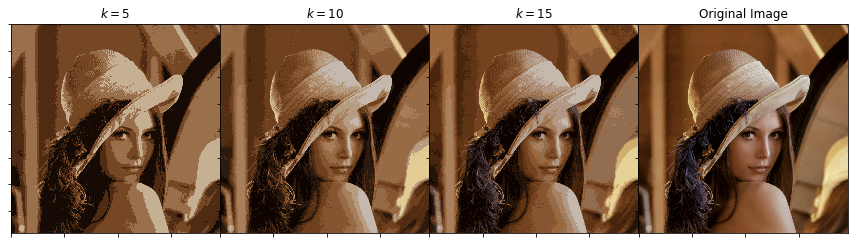

In [61]:
# Ploting our points with kmeans' labels
fig, axs = plt.subplots(1, 4,figsize=(15,15))
fig.subplots_adjust(wspace=0, hspace=0)
axs[0].imshow(test_image_k5)
axs[0].set_title(r'$k=5$')
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])

axs[1].imshow(test_image_k10)
axs[1].set_title(r'$k=10$')
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])
axs[2].imshow(test_image_k15)
axs[2].set_title(r'$k=15$')
axs[2].set_xticklabels([])
axs[2].set_yticklabels([])
axs[3].imshow(io.imread(r'C:\Users\Louis-Marc\Desktop\Cours\DS_fromScratch\lena.png'))
axs[3].set_title(r'Original Image')
axs[3].set_xticklabels([])
axs[3].set_yticklabels([])

1) Image saved successfully!
2) Image saved successfully!
3) Image saved successfully!
4) Image saved successfully!
5) Image saved successfully!
6) Image saved successfully!
7) Image saved successfully!
8) Image saved successfully!
9) Image saved successfully!


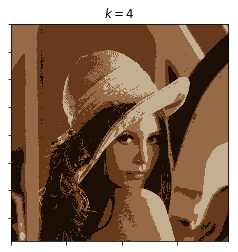

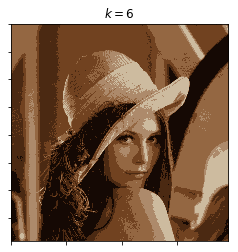

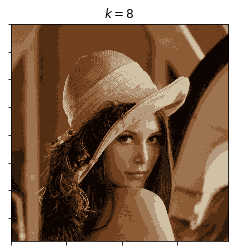

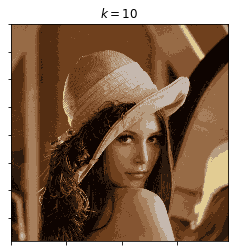

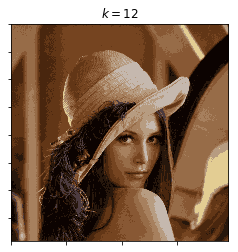

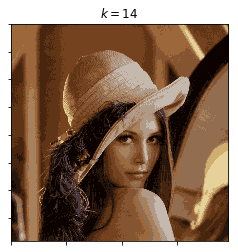

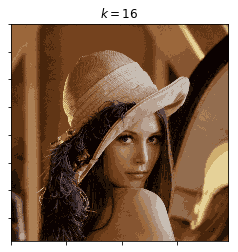

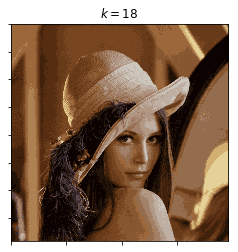

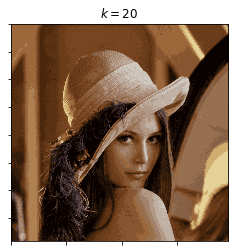

In [29]:
# Create a collection of images
image_collection = []
for i in range(1,10):
    image_array = image_quantization(r'C:\Users\Louis-Marc\Desktop\Cours\DS_fromScratch\lena.png',2*(i+1))
    image_collection.append(image_array)
    save_personalized_plot(image_array,2*(i+1),'lena_k'+str(2*(i+1)),r'lena')
    print(str(i) + ") Image saved successfully!")

In [171]:
# Create a GIF file of the images (the GIF can be founded in the same directory as the project on Github)
path = r'lena' 
png_files_paths = [path+"\\"+file for file in os.listdir(path) if file.endswith('.png')]
images = list(map(lambda filename: imageio.imread(filename), png_files_paths))
imageio.mimsave(os.path.join(path+"\\"+'lena_gif.gif'), images, duration = 1.5)
print('Done!')

Done!


We can compare the compression by checking the size of the original image of lena.

In [178]:
# Get the size of each image
original__image_size = os.path.getsize(r'C:\Users\Louis-Marc\Desktop\Cours\DS_fromScratch\lena.png')
images_size = [round(100*os.path.getsize(png_file_path)/original__image_size,5) for png_file_path in png_files_paths]
pp = pprint.PrettyPrinter(indent=4)
pattern = 'lena\\'
size_dictionary = dict(zip([png_file_path.replace(pattern,'') for png_file_path in png_files_paths],images_size))
pprint.pprint(size_dictionary)

{'lena_k02.png': 0.13516,
 'lena_k04.png': 0.24277,
 'lena_k06.png': 0.3556,
 'lena_k08.png': 0.46496,
 'lena_k10.png': 0.51886,
 'lena_k12.png': 0.58513,
 'lena_k14.png': 0.60607,
 'lena_k16.png': 0.64223,
 'lena_k18.png': 0.69739,
 'lena_k20.png': 0.76849}


As we can see, the higher $K$ is, the more space the picture is taking in our computer. Its impressive to see that even for our biggest image ($K=20$), the image is only about 0.77% of the original image size.